<a href="https://colab.research.google.com/github/LalithAdityaReddy/RCB_Data_Analysis/blob/main/project1_rcb_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
""" Key Analyses for RCB :
1: Overall Performance Over the Years
2: Top Run-Scorers & Wicket-Takers
3: Impact of Toss Decisions on Match Outcomes
4: Best Performing Venues for RCB
5: Head-to-Head Record vs Top Teams
6: Win/Loss Trends Over Time"""

' Key Analyses for RCB :\n1: Overall Performance Over the Years\n2: Top Run-Scorers & Wicket-Takers\n3: Impact of Toss Decisions on Match Outcomes\n4: Best Performing Venues for RCB\n5: Head-to-Head Record vs Top Teams\n6: Win/Loss Trends Over Time'

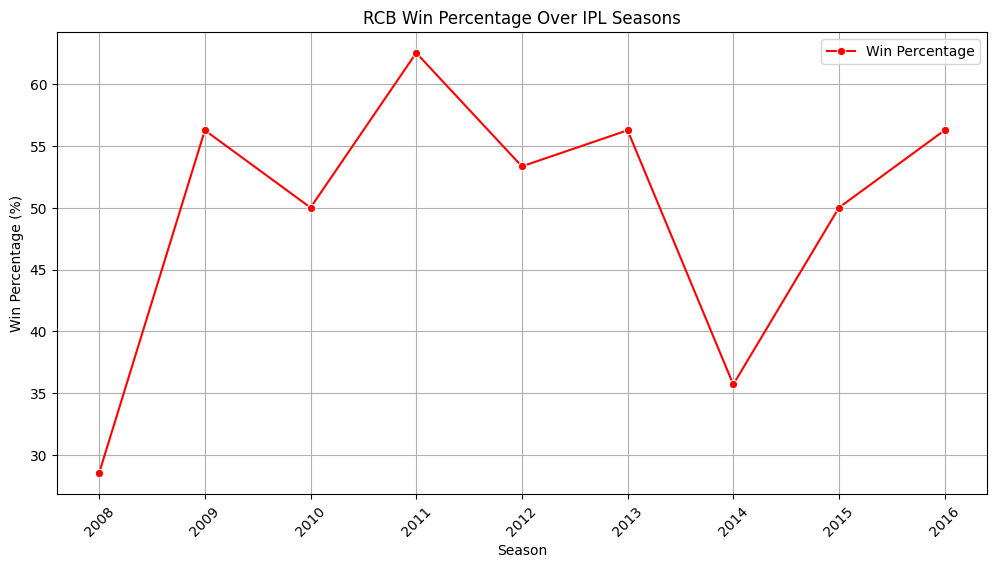

In [9]:
#for winning percentage of RCB team
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sqlite3
df=pd.read_csv('/IPL dataset.csv')
rcb_matches=df[df['team1'].str.contains('Royal Challengers Bangalore') | df['team2'].str.contains('Royal Challengers Bangalore')]
rcb_wins = rcb_matches[rcb_matches["winner"] == "Royal Challengers Bangalore"].groupby("season").size()
rcb_total_matches = rcb_matches.groupby("season").size()
rcb_win_pct = (rcb_wins / rcb_total_matches) * 100
plt.figure(figsize=(12, 6))
sns.lineplot(x=rcb_win_pct.index, y=rcb_win_pct.values, marker="o", color="red", label="Win Percentage")
plt.xlabel("Season")
plt.ylabel("Win Percentage (%)")
plt.title("RCB Win Percentage Over IPL Seasons")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-10-e61868896a24>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rcb_win_by_runs_season.index, y=rcb_win_by_runs_season.values, palette="coolwarm")


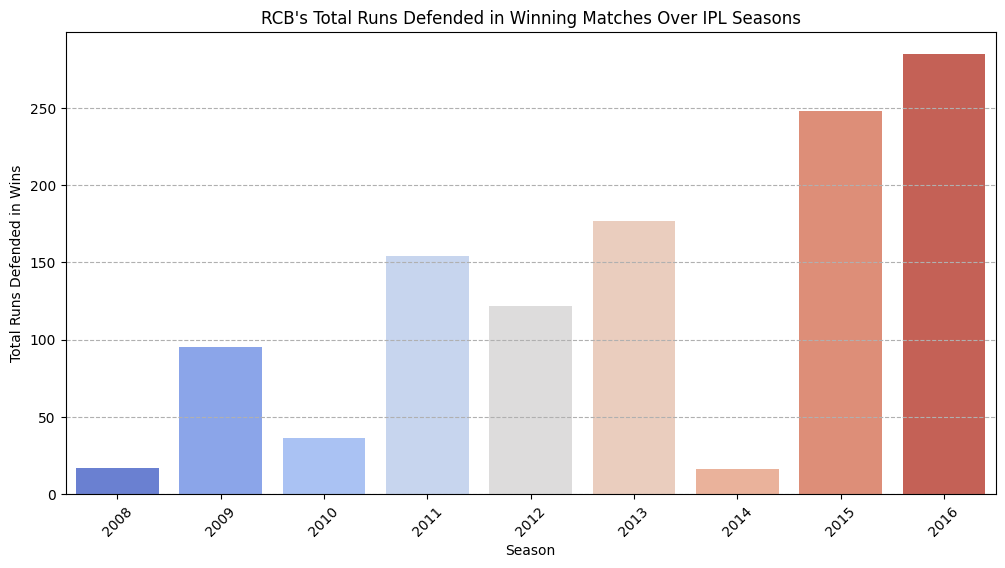

In [10]:
#win by runs
# Filtering matches where RCB won by runs (not by wickets)
rcb_wins_by_runs = rcb_matches[(rcb_matches["winner"] == "Royal Challengers Bangalore") & (rcb_matches["win_by_runs"] > 0)]

# Grouping by season and summing the win margins
rcb_win_by_runs_season = rcb_wins_by_runs.groupby("season")["win_by_runs"].sum()

# Plotting win margins over seasons
plt.figure(figsize=(12, 6))
sns.barplot(x=rcb_win_by_runs_season.index, y=rcb_win_by_runs_season.values, palette="coolwarm")
plt.xlabel("Season")
plt.ylabel("Total Runs Defended in Wins")
plt.title("RCB's Total Runs Defended in Winning Matches Over IPL Seasons")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.show()


<ipython-input-11-d67c51a9c571>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rcb_win_by_wic_season.index, y=rcb_win_by_wic_season.values, palette="coolwarm")


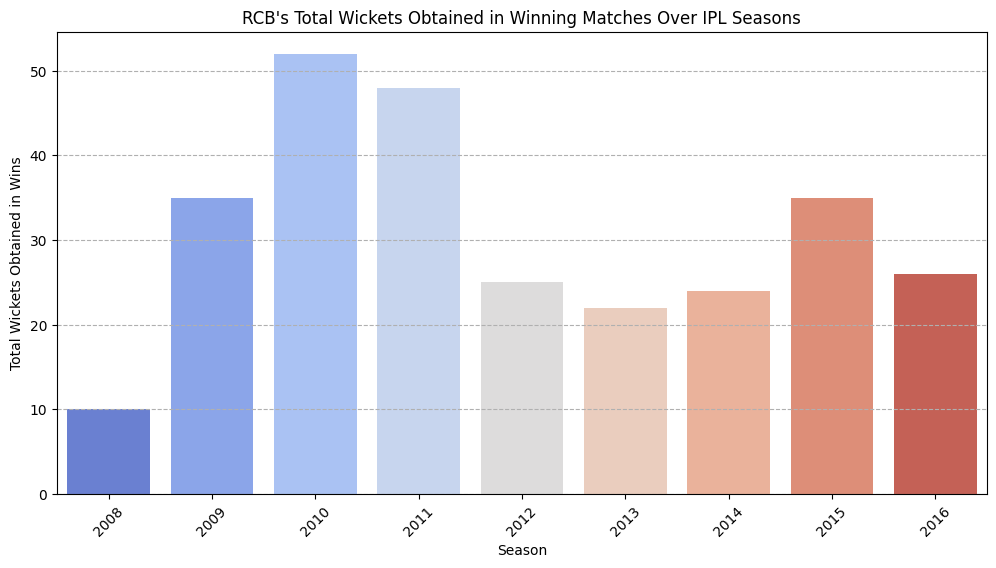

In [11]:
#win by wickets
rcb_wins_by_wic=rcb_matches[(rcb_matches["winner"] == "Royal Challengers Bangalore") & (rcb_matches["win_by_wickets"] > 0)]
rcb_win_by_wic_season = rcb_wins_by_wic.groupby("season")["win_by_wickets"].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=rcb_win_by_wic_season.index, y=rcb_win_by_wic_season.values, palette="coolwarm")
plt.xlabel("Season")
plt.ylabel("Total Wickets Obtained in Wins")
plt.title("RCB's Total Wickets Obtained in Winning Matches Over IPL Seasons")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.show()

<ipython-input-12-b30d95d6798c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rcb_mom.values, y=rcb_mom.index, palette="Reds_r")


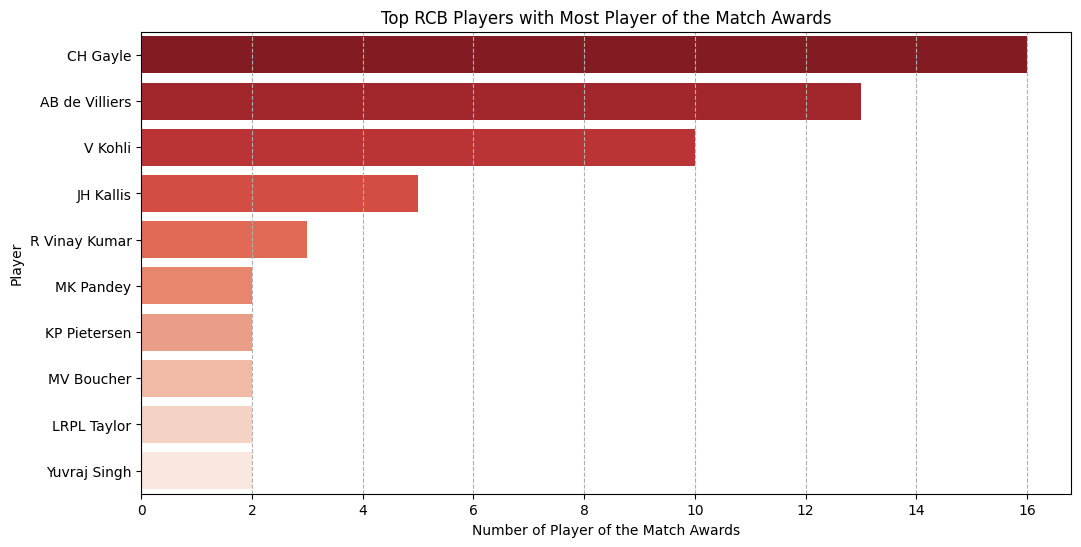

In [12]:
# Count Player of the Match awards for RCB
rcb_mom = rcb_matches[rcb_matches["winner"] == "Royal Challengers Bangalore"]["player_of_match"].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=rcb_mom.values, y=rcb_mom.index, palette="Reds_r")
plt.xlabel("Number of Player of the Match Awards")
plt.ylabel("Player")
plt.title("Top RCB Players with Most Player of the Match Awards")
plt.grid(axis="x", linestyle="--")
plt.show()

<ipython-input-13-078c5319a317>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rcb_toss_win_pct.index, y=rcb_toss_win_pct.values, palette="coolwarm")


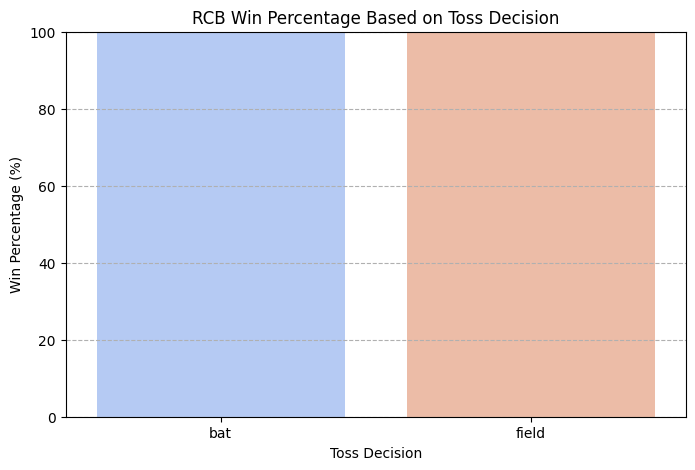

In [13]:
# Toss decision impact
rcb_toss_wins = rcb_matches[rcb_matches["winner"] == "Royal Challengers Bangalore"].groupby("toss_decision").size()
rcb_toss_total = rcb_matches[rcb_matches["toss_winner"] == "Royal Challengers Bangalore"].groupby("toss_decision").size()
rcb_toss_win_pct = (rcb_toss_wins / rcb_toss_total) * 100
plt.figure(figsize=(8, 5))
sns.barplot(x=rcb_toss_win_pct.index, y=rcb_toss_win_pct.values, palette="coolwarm")
plt.xlabel("Toss Decision")
plt.ylabel("Win Percentage (%)")
plt.title("RCB Win Percentage Based on Toss Decision")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--")
plt.show()


<ipython-input-14-cae238234c47>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_venues.values, y=top_venues.index, palette="Greens_r", ax=ax[0])
<ipython-input-14-cae238234c47>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_venues.values, y=bottom_venues.index, palette="Reds_r", ax=ax[1])


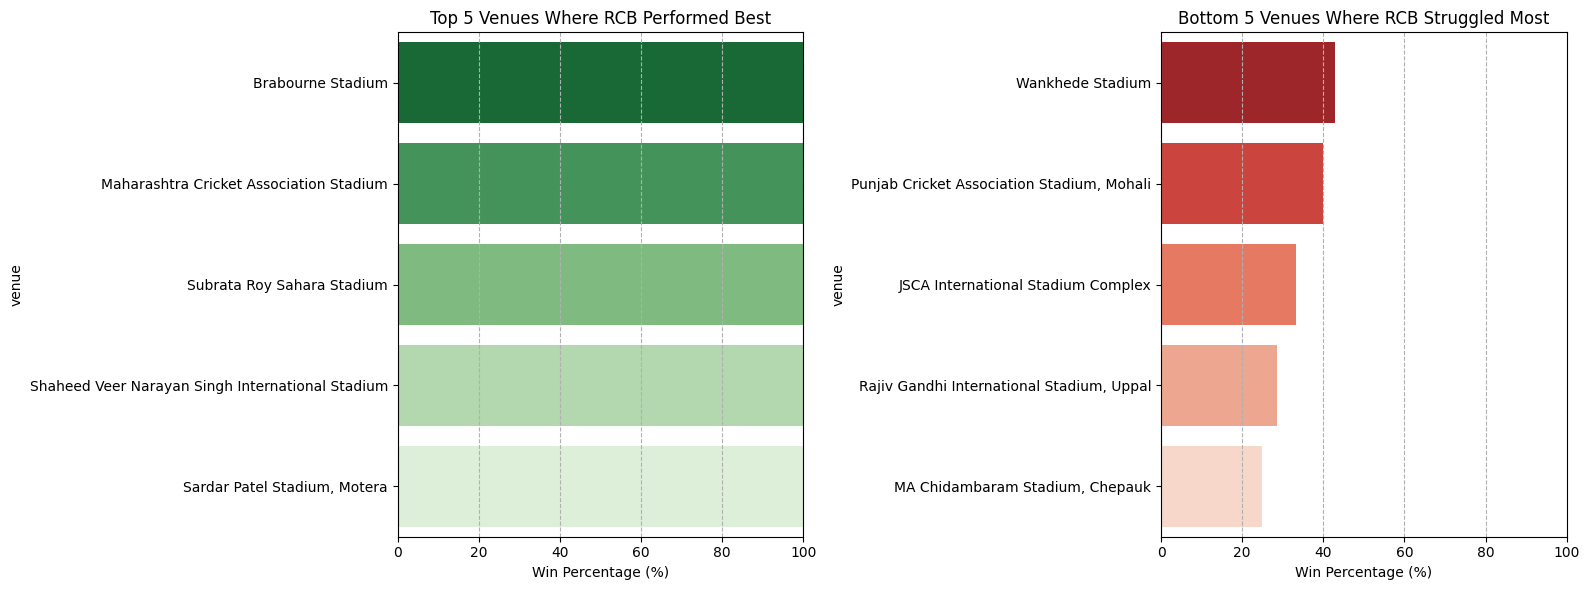

In [14]:
# Venue performance
rcb_venue_wins = rcb_matches[rcb_matches["winner"] == "Royal Challengers Bangalore"].groupby("venue").size()
rcb_venue_total = rcb_matches.groupby("venue").size()
rcb_venue_win_pct = (rcb_venue_wins / rcb_venue_total) * 100
rcb_venue_win_pct = rcb_venue_win_pct.dropna().sort_values(ascending=False)
top_venues = rcb_venue_win_pct.head(5)
bottom_venues = rcb_venue_win_pct.tail(5)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(x=top_venues.values, y=top_venues.index, palette="Greens_r", ax=ax[0])
ax[0].set_title("Top 5 Venues Where RCB Performed Best")
ax[0].set_xlabel("Win Percentage (%)")
ax[0].set_xlim(0, 100)
ax[0].grid(axis="x", linestyle="--")
sns.barplot(x=bottom_venues.values, y=bottom_venues.index, palette="Reds_r", ax=ax[1])
ax[1].set_title("Bottom 5 Venues Where RCB Struggled Most")
ax[1].set_xlabel("Win Percentage (%)")
ax[1].set_xlim(0, 100)
ax[1].grid(axis="x", linestyle="--")
plt.tight_layout()
plt.show()

<ipython-input-15-52ac2a16a520>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rcb_team_win_pct.values, y=rcb_team_win_pct.index, palette="Blues_r")


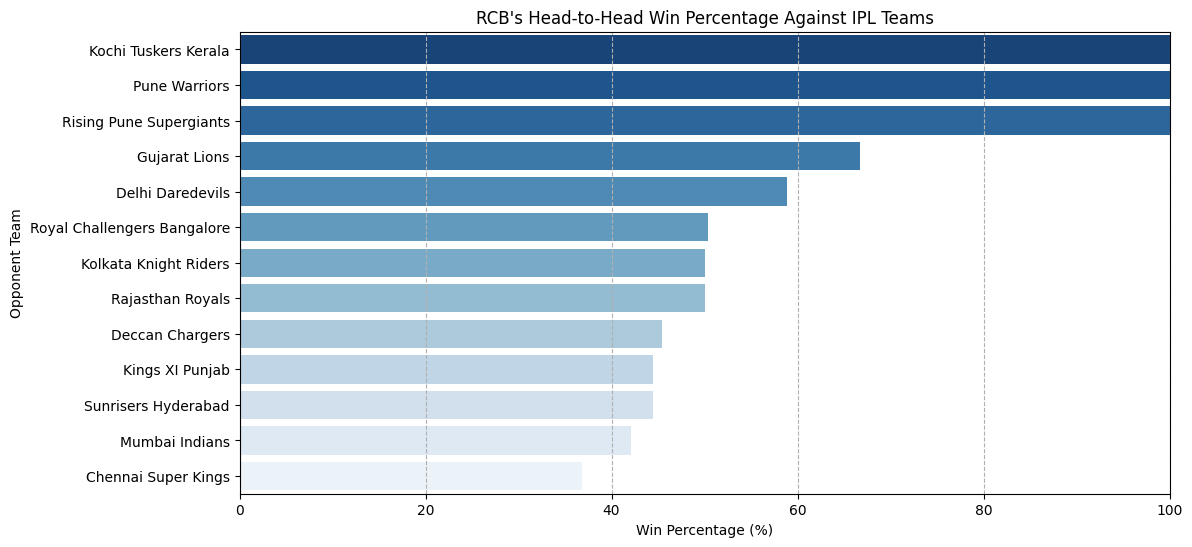

In [15]:
# Head-to-Head Performance
rcb_team_wins = rcb_matches[rcb_matches["winner"] == "Royal Challengers Bangalore"].groupby("team1").size().add(
    rcb_matches[rcb_matches["winner"] == "Royal Challengers Bangalore"].groupby("team2").size(), fill_value=0
)
rcb_team_total = rcb_matches.groupby("team1").size().add(
    rcb_matches.groupby("team2").size(), fill_value=0
)
rcb_team_win_pct = (rcb_team_wins / rcb_team_total) * 100
rcb_team_win_pct = rcb_team_win_pct.dropna().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=rcb_team_win_pct.values, y=rcb_team_win_pct.index, palette="Blues_r")
plt.xlabel("Win Percentage (%)")
plt.ylabel("Opponent Team")
plt.title("RCB's Head-to-Head Win Percentage Against IPL Teams")
plt.xlim(0, 100)
plt.grid(axis="x", linestyle="--")
plt.show()
